In [26]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif, chi2, mutual_info_classif
from boruta import BorutaPy

from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import classification_report, accuracy_score, plot_confusion_matrix, plot_precision_recall_curve

In [22]:
matplotlib.rcParams.update(_VSCode_defaultMatplotlib_Params)

In [23]:
plt.style.use('seaborn-bright')
plt.rcParams.update({'font.size': 18})

In [4]:
from sklearn import set_config

set_config(display="diagram")

In [5]:
X = pd.read_csv("../data/processed/x.csv")
y = pd.read_csv("../data/processed/y.csv")
y = y.values.ravel()

print(X.shape, y.shape)

(3000, 9) (3000,)


In [6]:
X

,Duration(sec),Paket Loss Rate(Reliability),Packet Delay Budget(Latency(ms)),Bandwidth(GHz),Delay Rate(Mbps),Speed(Mbps),Jitter(ps),User Device Type,Modulation Type
0,1.000000,1.000000,1.000000,0.032258,1.000000,0.349610,0.510791,8,0
1,0.074074,1.000000,0.122449,0.290323,0.081395,0.880298,0.539568,8,0
2,0.333333,0.000900,0.918367,0.290323,0.034884,0.939301,0.827338,8,0
3,0.111111,0.009901,0.224490,0.677419,0.034884,0.275687,1.000000,8,0
4,0.000000,0.000000,0.979592,1.000000,0.081395,0.642252,0.366906,8,0
...,...,...,...,...,...,...,...,...,...
2995,0.222222,1.000000,0.795918,0.290323,0.081395,0.483215,1.000000,1,1
2996,0.074074,0.000900,0.551020,0.000000,0.000000,0.156324,0.035971,1,1
2997,0.222222,0.000000,0.489796,0.000000,0.000000,0.576806,0.827338,1,1
2998,0.444444,0.099910,0.387755,0.516129,0.000000,0.136317,0.539568,1,1


# Baseline Random Forest

In [84]:
clf = RandomForestClassifier(n_estimators=200, n_jobs=-1, max_depth=5)

trans = BorutaPy(clf, random_state=42, verbose=2)
trans.fit(X_train, y_train)
X_train_fs = trans.transform(X_train)
X_test_fs = trans.transform(X_test)

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	9
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	9
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	9
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	9
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	9
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	9
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	9
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	2
Tentative: 	0
Rejected: 	7


BorutaPy finished running.

Iteration: 	9 / 100
Confirmed: 	2
Tentative: 	0
Rejected: 	7


In [86]:
trans.support_

array([False, False, False, False, False, False, False,  True,  True])

# ANOVA

In [7]:
X_numeric_class = X.iloc[:, :-2]
X_numeric_class

,Duration(sec),Paket Loss Rate(Reliability),Packet Delay Budget(Latency(ms)),Bandwidth(GHz),Delay Rate(Mbps),Speed(Mbps),Jitter(ps)
0,1.000000,1.000000,1.000000,0.032258,1.000000,0.349610,0.510791
1,0.074074,1.000000,0.122449,0.290323,0.081395,0.880298,0.539568
2,0.333333,0.000900,0.918367,0.290323,0.034884,0.939301,0.827338
3,0.111111,0.009901,0.224490,0.677419,0.034884,0.275687,1.000000
4,0.000000,0.000000,0.979592,1.000000,0.081395,0.642252,0.366906
...,...,...,...,...,...,...,...
2995,0.222222,1.000000,0.795918,0.290323,0.081395,0.483215,1.000000
2996,0.074074,0.000900,0.551020,0.000000,0.000000,0.156324,0.035971
2997,0.222222,0.000000,0.489796,0.000000,0.000000,0.576806,0.827338
2998,0.444444,0.099910,0.387755,0.516129,0.000000,0.136317,0.539568


In [8]:
F_score, p_value = f_classif(X_numeric_class, y)

fi_anova = pd.Series(F_score, index=X_numeric_class.columns)

fi_anova

Duration(sec)                       0.638502
Paket Loss Rate(Reliability)        0.092658
Packet Delay Budget(Latency(ms))    0.491071
Bandwidth(GHz)                      0.313648
Delay Rate(Mbps)                    0.145061
Speed(Mbps)                         0.223775
Jitter(ps)                          0.763535
dtype: float64

In [27]:
sns.set_theme(style="whitegrid")

<AxesSubplot:>

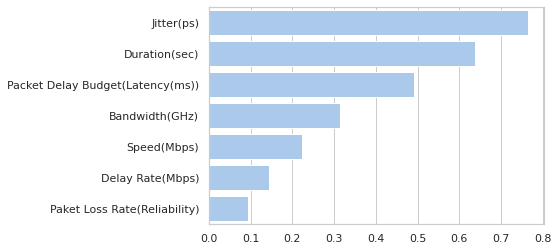

In [34]:
sns.set_color_codes("pastel")

sns.barplot(y=fi_anova.sort_values(ascending=False).index, x=fi_anova.sort_values(ascending=False), color="b", label="ANOVA F-score", orient='h')

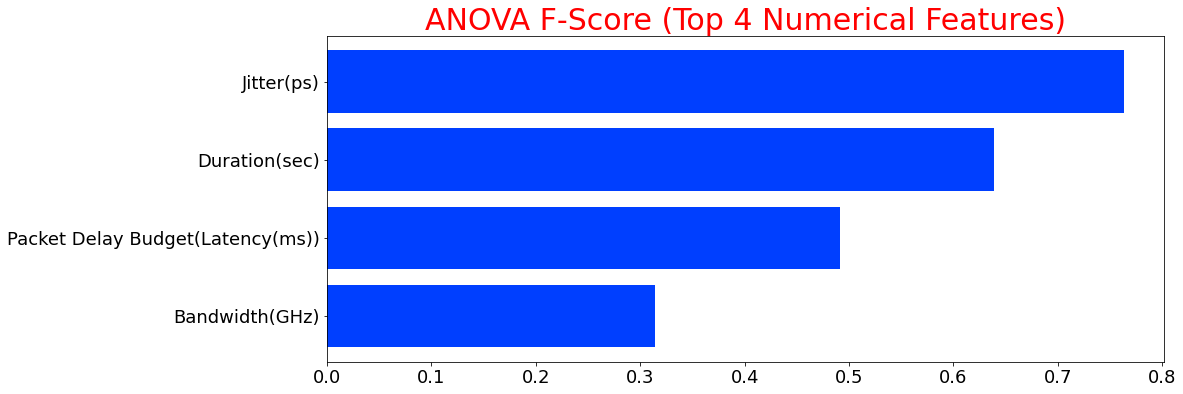

In [25]:
fig,ax = plt.subplots(figsize=(15,6))
# fig.set_size_inches(15,6)
ax.barh(fi_anova.sort_values()[-4:].index, fi_anova.sort_values()[-4:].values)
# plt.xticks(rotation=90)
ax.set_title(label="ANOVA F-Score (Top 4 Numerical Features)",
            fontsize=30,
            color="red")
# extent = ax.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
plt.savefig("../plots/anova_5g.pdf", dpi=600)
plt.show()

# CHI SQUARE

In [44]:
score, p_value = chi2(X_numeric_class, y)

fi_chi2 = pd.Series(score, index=X_numeric_class.columns)

fi_chi2

Duration(sec)                       0.421486
Paket Loss Rate(Reliability)        0.099765
Packet Delay Budget(Latency(ms))    0.129590
Bandwidth(GHz)                      0.140110
Delay Rate(Mbps)                    0.119221
Speed(Mbps)                         0.073447
Jitter(ps)                          0.343648
dtype: float64

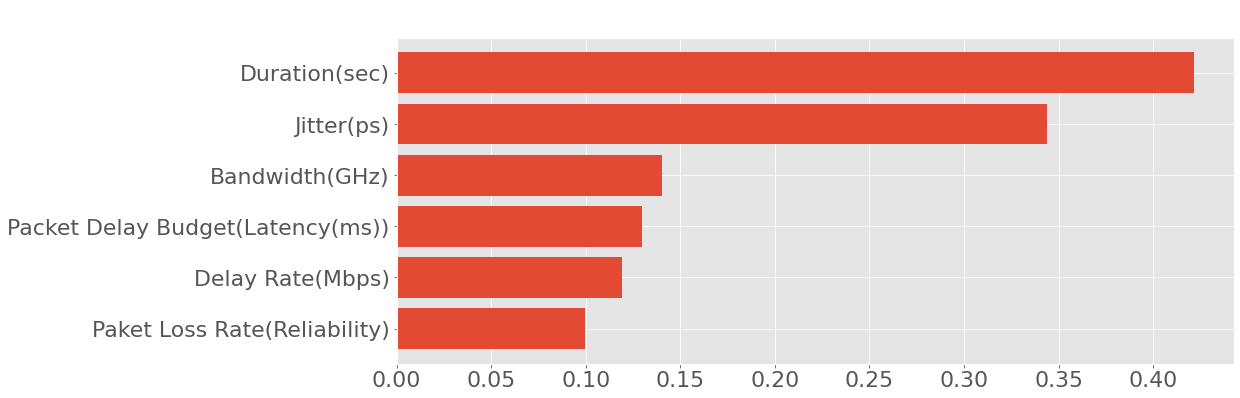

In [45]:
fig,ax = plt.subplots()
fig.set_size_inches(15,6)
ax.barh(fi_chi2.sort_values()[-6:].index, fi_chi2.sort_values()[-6:].values)
# plt.xticks(rotation=90)
plt.title('CHI Square Score')
plt.show()

# MUTUAL INFO

In [48]:
importance = mutual_info_classif(X_numeric_class, y)

fi_minfo = pd.Series(importance, index=X_numeric_class.columns)

fi_minfo

Duration(sec)                       0.003096
Paket Loss Rate(Reliability)        0.000000
Packet Delay Budget(Latency(ms))    0.008585
Bandwidth(GHz)                      0.007845
Delay Rate(Mbps)                    0.011487
Speed(Mbps)                         0.000000
Jitter(ps)                          0.014585
dtype: float64

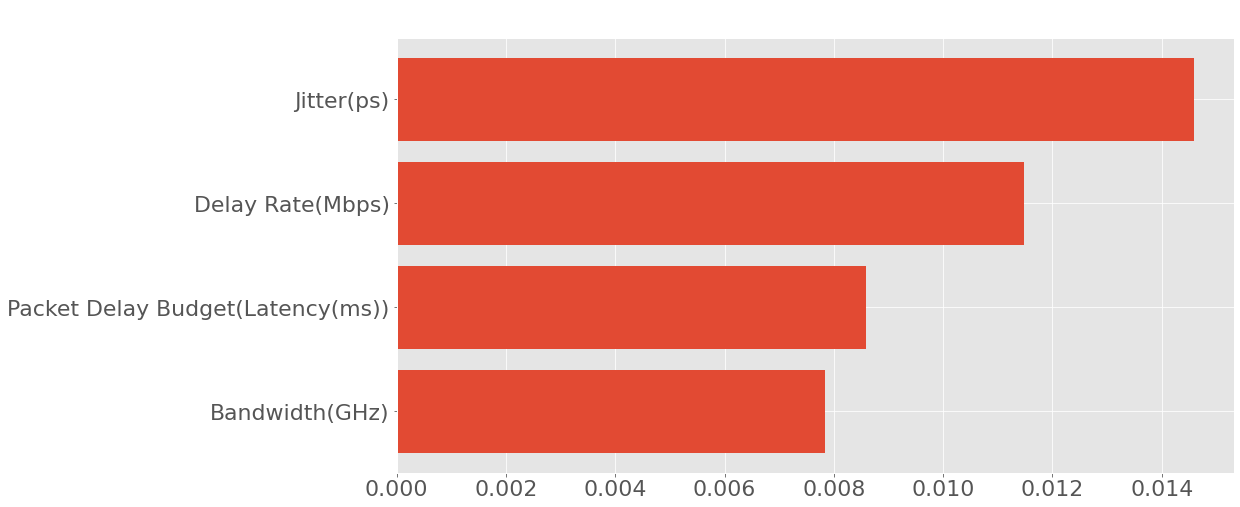

In [50]:
fig,ax = plt.subplots()
fig.set_size_inches(15,8)
ax.barh(fi_minfo.sort_values()[-4:].index, fi_minfo.sort_values()[-4:].values)
# plt.xticks(rotation=90)
plt.title('MUTUAL Info Gain Score')
plt.show()

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

scale = MinMaxScaler()

# Standardize features by removing the mean and scaling to unit variance
X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)

In [52]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2400, 9), (600, 9), (2400,), (600,))